In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1-9XJZt48uExqIuRcCHTJS7bBluOShF

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

np.random.seed(64)
tf.random.set_seed(64)


## section3

In [12]:
df = pd.read_csv("/content/creditcard.csv")

In [13]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
df = df.drop(columns='Time')

In [15]:
scaler = StandardScaler()
scaler.fit(df[['Amount']])
df['Amount'] = scaler.transform(df[['Amount']])


In [16]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [17]:
X = df.drop(['Class'], axis=1)
y = df['Class']


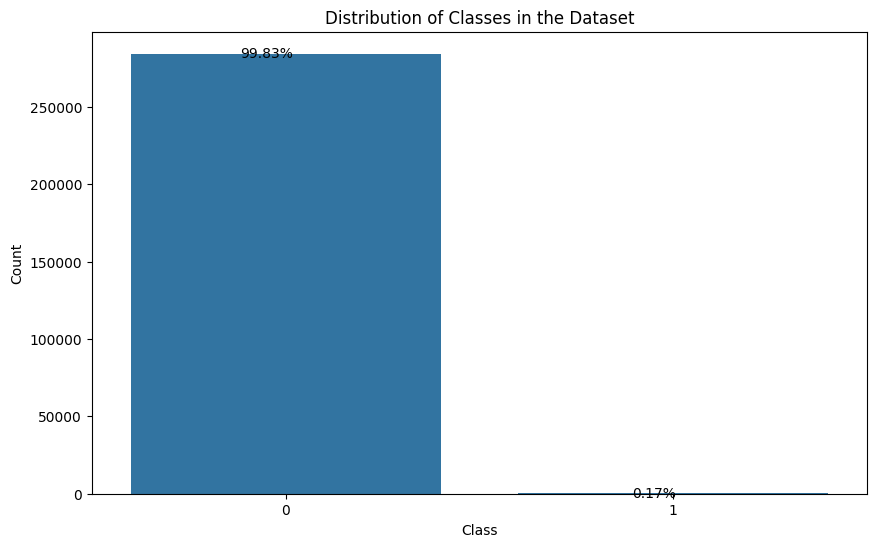

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')


total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    plt.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

In [18]:
unique_classes = np.unique(y)
num_classes = len(unique_classes)
print(f"Number of classes: {num_classes}")
y_categorical = to_categorical(y, num_classes=num_classes)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, train_size=0.6, random_state=64, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64, stratify=y_temp)


Number of classes: 2


In [19]:
train_class_distribution = np.sum(y_train, axis=0)
valid_class_distribution = np.sum(y_valid, axis=0)
test_class_distribution = np.sum(y_test, axis=0)

In [20]:
print("Training set class distribution:\n", train_class_distribution)
print("\nValidation set class distribution:\n", valid_class_distribution)
print("\nTesting set class distribution:\n", test_class_distribution)

Training set class distribution:
 [170589.    295.]

Validation set class distribution:
 [56863.    98.]

Testing set class distribution:
 [56863.    99.]


In [21]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
234376,2.047347,-0.158772,-1.256804,0.195757,0.098301,-0.627702,0.040854,-0.129396,0.390688,0.256446,...,-0.224800,-0.273044,-0.717107,0.272619,-0.506372,-0.283056,0.209400,-0.078989,-0.075559,-0.335278
4435,1.342045,-0.781835,-0.949522,-1.591398,1.427995,3.285794,-1.129644,0.702388,0.356492,0.267718,...,0.284571,-0.259509,-0.914461,0.054187,0.921596,0.345758,-0.511655,-0.025730,0.020785,-0.062728
78760,1.121201,0.220227,0.540991,1.473032,-0.269199,-0.349914,0.125522,-0.068915,0.187025,-0.145815,...,-0.144661,-0.067714,0.041241,-0.037661,0.436065,0.633703,-0.335940,0.041713,0.022377,-0.276146
235203,-2.001623,-0.033838,1.451092,0.877590,0.425357,1.359930,0.200614,0.201108,0.554977,0.186482,...,-0.327913,-0.412594,-0.528514,-0.553627,-1.380600,0.552882,-0.508361,-0.046948,0.383987,0.246484
56179,-0.146227,0.872793,1.134491,0.816464,0.528661,0.256962,0.610926,-0.085399,0.044743,-0.781195,...,0.165055,-0.117539,0.149881,-0.245217,-0.476330,-0.344758,0.506120,0.007918,-0.056642,-0.304013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211978,-0.204542,0.600884,-0.642149,-1.246668,0.916036,-1.686240,1.881956,-0.427707,-0.193218,-0.842542,...,-0.330297,0.269541,0.676759,-0.077119,0.062276,-0.402440,0.348420,0.068488,0.202501,-0.095753
145360,2.068341,-0.144856,-1.631910,0.061180,0.368960,-0.434330,0.015153,-0.076947,0.515814,0.209656,...,-0.262972,0.253188,0.772544,-0.009785,0.356813,0.270660,-0.135149,-0.035921,-0.068051,-0.349231
35948,-1.216644,0.697233,0.959390,-0.832076,-0.203977,-1.307313,0.532724,0.293254,-0.486949,-0.856962,...,0.160590,-0.068539,-0.488784,0.131301,0.410285,-0.294840,0.650309,0.117407,0.063402,-0.122020
82657,-1.287512,3.274918,-3.420194,1.692523,-0.273129,-1.836244,-0.494904,1.499540,-0.682318,-1.242157,...,0.082903,-0.004658,0.012586,0.397672,0.075725,-0.277412,-0.372152,0.104153,-0.061818,-0.349271


In [22]:
smote = SMOTE(sampling_strategy='minority', random_state=64)
X_train_res, y_train_res = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
y_train_res = to_categorical(y_train_res, num_classes=2)

In [23]:
# Adding Gaussian noise to the data
def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

X_train_noisy = add_noise(X_train_res)
X_valid_noisy = add_noise(X_valid)

# Define the autoencoder model
input_dim = X_train_res.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(22, activation="relu")(encoder)
encoder = Dense(15, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
encoder = Dense(15, activation="relu")(encoder)
encoder = Dense(22, activation="relu")(encoder)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

checkpoint = ModelCheckpoint('best_autoencoder.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

autoencoder.fit(X_train_noisy, X_train_res,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_valid_noisy, X_valid),
                callbacks=[checkpoint],
                verbose=1)



Epoch 1/20
1332/1333 [============================>.] - ETA: 0s - loss: 12.5719
Epoch 1: val_loss improved from inf to 1.06540, saving model to best_autoencoder.h5
1333/1333 [==============================] - 13s 9ms/step - loss: 12.5709 - val_loss: 1.0654
Epoch 2/20
   8/1333 [..............................] - ETA: 10s - loss: 12.3111

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1319/1333 [============================>.] - ETA: 0s - loss: 12.4736
Epoch 2: val_loss improved from 1.06540 to 1.05062, saving model to best_autoencoder.h5
1333/1333 [==============================] - 5s 4ms/step - loss: 12.4794 - val_loss: 1.0506
Epoch 3/20
1327/1333 [============================>.] - ETA: 0s - loss: 12.4659
Epoch 3: val_loss improved from 1.05062 to 1.03009, saving model to best_autoencoder.h5
1333/1333 [==============================] - 5s 4ms/step - loss: 12.4682 - val_loss: 1.0301
Epoch 4/20
1330/1333 [============================>.] - ETA: 0s - loss: 12.4569
Epoch 4: val_loss improved from 1.03009 to 1.02101, saving model to best_autoencoder.h5
1333/1333 [==============================] - 7s 5ms/step - loss: 12.4531 - val_loss: 1.0210
Epoch 5/20
1327/1333 [============================>.] - ETA: 0s - loss: 12.4461
Epoch 5: val_loss improved from 1.02101 to 1.01893, saving model to best_autoencoder.h5
1333/1333 [==============================] - 5s 4ms/step - loss

In [24]:
autoencoder.load_weights('best_autoencoder.h5')
# Denoise the data
X_train_denoised = autoencoder.predict(X_train_noisy)
X_valid_denoised = autoencoder.predict(X_valid_noisy)

# Define the classifier model
classifier_input = Input(shape=(input_dim,))
classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
classifier_layer = Dense(22, activation="relu")(classifier_layer)
classifier_layer = Dense(15, activation="relu")(classifier_layer)
classifier_layer = Dense(10, activation="relu")(classifier_layer)
classifier_layer = Dense(5, activation="relu")(classifier_layer)
classifier_layer = Dense(2, activation='softmax')(classifier_layer)

classifier = Model(inputs=classifier_input, outputs=classifier_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier_checkpoint = ModelCheckpoint('best_classifier.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the classifier with the ModelCheckpoint callback
classifier.fit(X_train_denoised, y_train_res,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_valid_denoised, y_valid),
               callbacks=[classifier_checkpoint],
               verbose=1)



1781/1781 [==============================] - 3s 2ms/step
Epoch 1/20
1328/1333 [============================>.] - ETA: 0s - loss: 0.1660 - accuracy: 0.9362
Epoch 1: val_loss improved from inf to 0.09045, saving model to best_classifier.h5
1333/1333 [==============================] - 9s 6ms/step - loss: 0.1659 - accuracy: 0.9363 - val_loss: 0.0905 - val_accuracy: 0.9701
Epoch 2/20
  39/1333 [..............................] - ETA: 3s - loss: 0.1227 - accuracy: 0.9532

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1327/1333 [============================>.] - ETA: 0s - loss: 0.1171 - accuracy: 0.9543
Epoch 2: val_loss improved from 0.09045 to 0.08667, saving model to best_classifier.h5
1333/1333 [==============================] - 4s 3ms/step - loss: 0.1171 - accuracy: 0.9543 - val_loss: 0.0867 - val_accuracy: 0.9675
Epoch 3/20
1331/1333 [============================>.] - ETA: 0s - loss: 0.1088 - accuracy: 0.9565
Epoch 3: val_loss did not improve from 0.08667
1333/1333 [==============================] - 5s 4ms/step - loss: 0.1088 - accuracy: 0.9565 - val_loss: 0.0929 - val_accuracy: 0.9638
Epoch 4/20
1323/1333 [============================>.] - ETA: 0s - loss: 0.1041 - accuracy: 0.9579
Epoch 4: val_loss did not improve from 0.08667
1333/1333 [==============================] - 7s 5ms/step - loss: 0.1041 - accuracy: 0.9579 - val_loss: 0.1006 - val_accuracy: 0.9590
Epoch 5/20
1326/1333 [============================>.] - ETA: 0s - loss: 0.1012 - accuracy: 0.9591
Epoch 5: val_loss did not improve from 

## section 4

In [25]:
classifier.load_weights('best_classifier.h5')
X_test_noisy = add_noise(X_test)
X_test_denoised = autoencoder.predict(X_test)

evaluation = classifier.evaluate(X_test_denoised, y_test, verbose=0)
print(f'Loss: {evaluation[0]}, Accuracy: {evaluation[1]}')

y_pred = np.argmax(classifier.predict(X_test_denoised), axis=1)
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
print(f'Recall: {recall}')


1781/1781 [==============================] - 5s 3ms/step
Loss: 0.5622572302818298, Accuracy: 0.8744250535964966
1781/1781 [==============================] - 5s 3ms/step
Recall: 0.9191919191919192


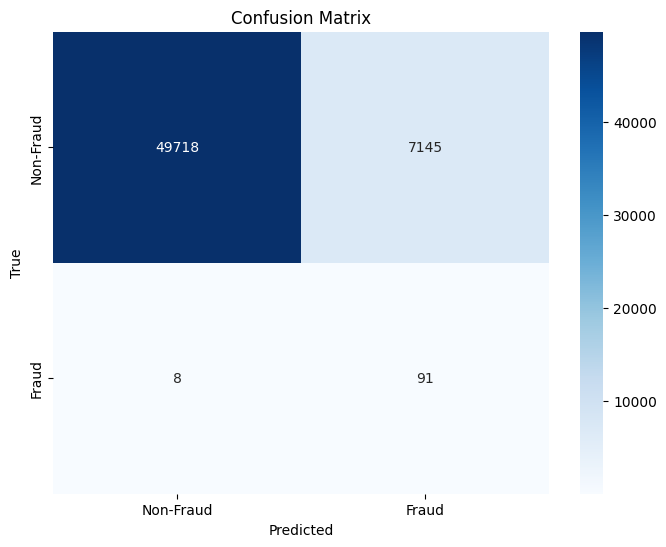

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.87      0.93     56863
       Fraud       0.01      0.92      0.02        99

    accuracy                           0.87     56962
   macro avg       0.51      0.90      0.48     56962
weighted avg       1.00      0.87      0.93     56962



In [26]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['Non-Fraud', 'Fraud']))

1781/1781 [==============================] - 3s 2ms/step
Loss: 0.07885134220123291, Accuracy: 0.967487096786499
1781/1781 [==============================] - 3s 2ms/step
Recall: 0.898989898989899
Precision: 0.06472727272727273
F1-score: 0.12075983717774763


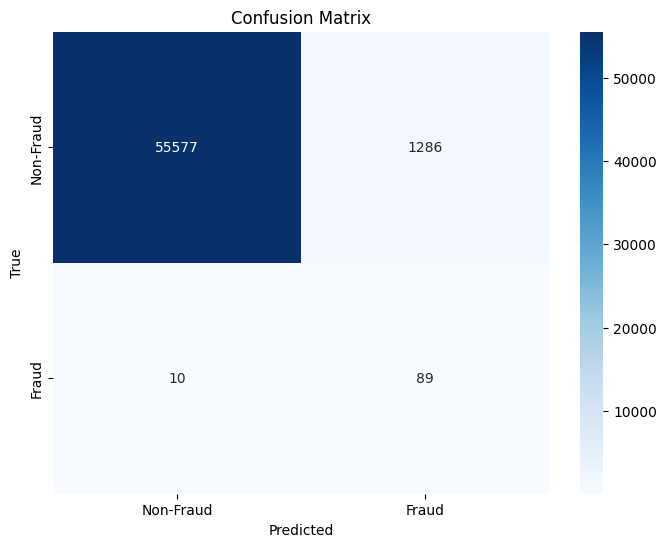

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99     56863
       Fraud       0.06      0.90      0.12        99

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [27]:
# Evaluate the classifier on the test set
X_test_noisy = add_noise(X_test)
X_test_denoised = autoencoder.predict(X_test_noisy)

evaluation = classifier.evaluate(X_test_denoised, y_test, verbose=0)
print(f'Loss: {evaluation[0]}, Accuracy: {evaluation[1]}')

# Predict probabilities
y_pred_prob = classifier.predict(X_test_denoised)

# Adjust threshold
threshold = 0.6  # You can adjust this value
y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

# Calculate recall
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
print(f'Recall: {recall}')

# Calculate precision
precision = precision_score(np.argmax(y_test, axis=1), y_pred)
print(f'Precision: {precision}')

# Calculate F1-score
f1 = f1_score(np.argmax(y_test, axis=1), y_pred)
print(f'F1-score: {f1}')

# Plot the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['Non-Fraud', 'Fraud']))

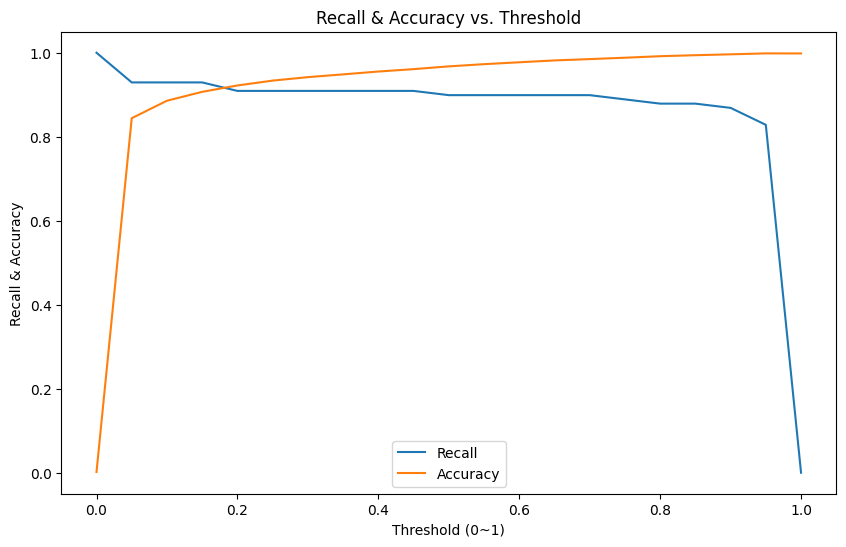

In [28]:
thresholds = np.arange(0.0, 1.05, 0.05)

recalls = []
accuracies = []
for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Recall & Accuracy')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()

|   Threshold | Recall Rate   | Accuracy   |
|------------:|:--------------|:-----------|
|         0.2 | 90.91%        | 92.20%     |
|         0.3 | 90.91%        | 94.18%     |
|         0.4 | 90.91%        | 95.52%     |
|         0.5 | 89.90%        | 96.75%     |
|         0.6 | 89.90%        | 97.72%     |
|         0.7 | 89.90%        | 98.48%     |
|         0.8 | 87.88%        | 99.17%     |


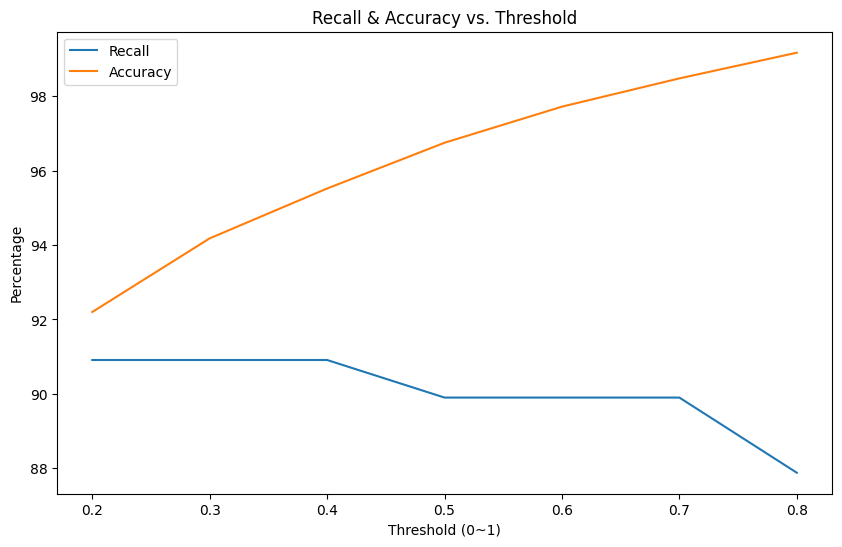

In [29]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

results = []
for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    results.append({'Threshold': threshold, 'Recall Rate': f'{recall:.2%}', 'Accuracy': f'{accuracy:.2%}'})

results_df = pd.DataFrame(results)

print(results_df.to_markdown(index=False))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, [float(r['Recall Rate'].strip('%')) for r in results], label='Recall')
plt.plot(thresholds, [float(r['Accuracy'].strip('%')) for r in results], label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Percentage')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()

## section5

Resampled dataset shape with strategy 0.1: (187647, 29) (187647, 2)
Epoch 1/20
733/733 [==============================] - 4s 3ms/step - loss: 3.2015 - val_loss: 1.0770
Epoch 2/20
733/733 [==============================] - 3s 4ms/step - loss: 3.1260 - val_loss: 1.0695
Epoch 3/20
733/733 [==============================] - 3s 5ms/step - loss: 3.1196 - val_loss: 1.0653
Epoch 4/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0976 - val_loss: 1.0383
Epoch 5/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0580 - val_loss: 0.9939
Epoch 6/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0355 - val_loss: 0.9905
Epoch 7/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0334 - val_loss: 0.9892
Epoch 8/20
733/733 [==============================] - 2s 3ms/step - loss: 3.0317 - val_loss: 0.9885
Epoch 9/20
733/733 [==============================] - 3s 5ms/step - loss: 3.0308 - val_loss: 0.9872
Epoch 10/20
733/733 [===========

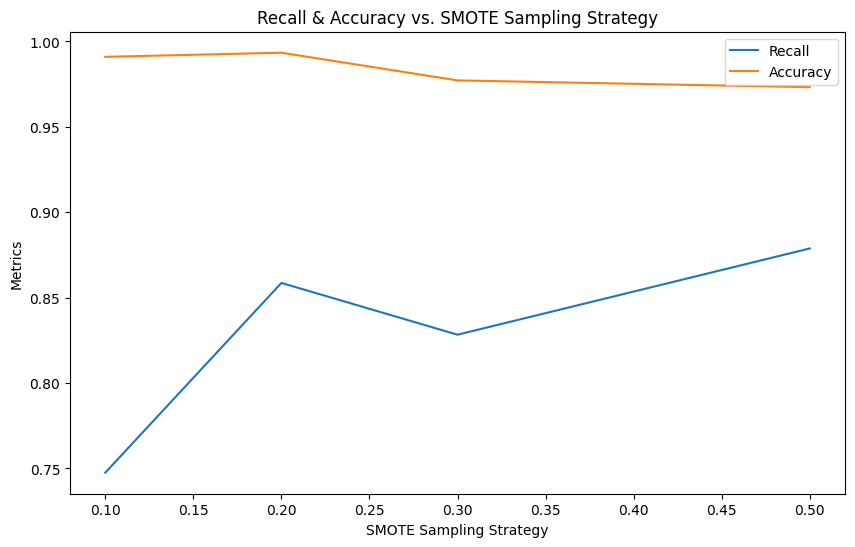

In [ ]:
sampling_strategies = [0.1, 0.2, 0.3, 0.5]

results = []

for strategy in sampling_strategies:
    # Apply SMOTE with the current sampling strategy
    smote = SMOTE(sampling_strategy=strategy, random_state=64)
    X_train_res, y_train_res = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
    y_train_res = to_categorical(y_train_res, num_classes=2)

    print(f'Resampled dataset shape with strategy {strategy}:', X_train_res.shape, y_train_res.shape)

    # Adding Gaussian noise to the data
    def add_noise(data, noise_factor=0.2):
        noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
        noisy_data = np.clip(noisy_data, 0., 1.)
        return noisy_data

    X_train_noisy = add_noise(X_train_res)
    X_valid_noisy = add_noise(X_valid)

    # Define the autoencoder model
    input_dim = X_train_res.shape[1]
    encoding_dim = 10

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(22, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(encoding_dim, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(22, activation="relu")(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(X_train_noisy, X_train_res,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(X_valid_noisy, X_valid),
                    verbose=1)

    # Denoise the data
    X_train_denoised = autoencoder.predict(X_train_noisy)
    X_valid_denoised = autoencoder.predict(X_valid_noisy)

    # Define the classifier model
    classifier_input = Input(shape=(input_dim,))
    classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
    classifier_layer = Dense(22, activation="relu")(classifier_layer)
    classifier_layer = Dense(15, activation="relu")(classifier_layer)
    classifier_layer = Dense(10, activation="relu")(classifier_layer)
    classifier_layer = Dense(5, activation="relu")(classifier_layer)
    classifier_layer = Dense(2, activation='softmax')(classifier_layer)  # Two neurons with softmax activation

    classifier = Model(inputs=classifier_input, outputs=classifier_layer)
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Categorical crossentropy loss

    # Train the classifier
    classifier.fit(X_train_denoised, y_train_res,
                   epochs=20,
                   batch_size=256,
                   shuffle=True,
                   validation_data=(X_valid_denoised, y_valid),
                   verbose=1)

    # Evaluate the classifier on the test set
    X_test_noisy = add_noise(X_test)
    X_test_denoised = autoencoder.predict(X_test_noisy)

    # Predict probabilities
    y_pred_prob = classifier.predict(X_test_denoised)

    # Define a fixed threshold for classification
    threshold = 0.5
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

    # Calculate recall and accuracy
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    results.append({'SMOTE Threshold': strategy, 'Recall Rate': recall, 'Accuracy': accuracy})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot recall and accuracy against SMOTE sampling strategies
plt.figure(figsize=(10, 6))
plt.plot(results_df['SMOTE Threshold'], results_df['Recall Rate'], label='Recall')
plt.plot(results_df['SMOTE Threshold'], results_df['Accuracy'], label='Accuracy')
plt.xlabel('SMOTE Sampling Strategy')
plt.ylabel('Metrics')
plt.title('Recall & Accuracy vs. SMOTE Sampling Strategy')
plt.legend()
plt.show()

## section 6

In [30]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ML2024/MP3/Q3/creditcard.csv")

# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

X = data.drop(['Class'], axis=1)
y = data['Class']

y_categorical = to_categorical(y, num_classes=2)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, train_size=0.6, random_state=64, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64, stratify=np.argmax(y_temp, axis=1))

def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

X_train_noisy = add_noise(X_train)
X_valid_noisy = add_noise(X_valid)
X_test_noisy = add_noise(X_test)
# Define the classifier model
input_dim = X_train.shape[1]

classifier_input = Input(shape=(input_dim,))
classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
classifier_layer = Dense(22, activation="relu")(classifier_layer)
classifier_layer = Dense(15, activation="relu")(classifier_layer)
classifier_layer = Dense(10, activation="relu")(classifier_layer)
classifier_layer = Dense(5, activation="relu")(classifier_layer)
classifier_layer = Dense(2, activation='softmax')(classifier_layer)

classifier = Model(inputs=classifier_input, outputs=classifier_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
classifier.fit(X_train_noisy, y_train,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_valid_noisy, y_valid),
               verbose=1)

# Evaluate the classifier on the test set
y_pred_prob = classifier.predict(X_test_noisy)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate performance metrics
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

# Print classification report
print(f'Classification Report (Unbalanced Data with Noise Added):\n')
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['Non-Fraud', 'Fraud']))

# Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:\n", cm)

# Print accuracy and recall
print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')

Epoch 1/20
668/668 [==============================] - 6s 6ms/step - loss: 0.0371 - accuracy: 0.9983 - val_loss: 0.0067 - val_accuracy: 0.9983
Epoch 2/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0044 - val_accuracy: 0.9983
Epoch 3/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0045 - accuracy: 0.9983 - val_loss: 0.0040 - val_accuracy: 0.9983
Epoch 4/20
668/668 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 0.0040 - val_accuracy: 0.9983
Epoch 5/20
668/668 [==============================] - 4s 5ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 6/20
668/668 [==============================] - 4s 5ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/20
668/668 [==============================] - 4s 6ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 

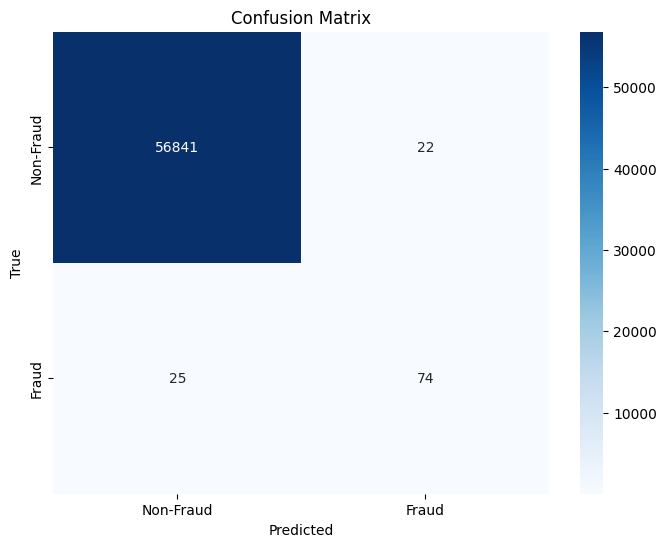

In [31]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()